In [4]:
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt

In [5]:
data = np.load('us_topo.npy')

In [10]:
!wget 'https://neo.sci.gsfc.nasa.gov/servlet/RenderData?si=196466&cs=rgb&format=CSV&width=3600&height=1800'

--2021-02-01 09:59:45--  https://neo.sci.gsfc.nasa.gov/servlet/RenderData?si=196466&cs=rgb&format=CSV&width=3600&height=1800
Resolving neo.sci.gsfc.nasa.gov (neo.sci.gsfc.nasa.gov)... 2001:4d0:2418:132::88, 169.154.132.88
Connecting to neo.sci.gsfc.nasa.gov (neo.sci.gsfc.nasa.gov)|2001:4d0:2418:132::88|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘RenderData?si=196466&cs=rgb&format=CSV&width=3600&height=1800’

RenderData?si=19646     [              <=>   ]  47.50M  1.87MB/s    in 25s     

2021-02-01 10:00:10 (1.93 MB/s) - ‘RenderData?si=196466&cs=rgb&format=CSV&width=3600&height=1800’ saved [49811330]



In [12]:
mv 'RenderData?si=196466&cs=rgb&format=CSV&width=3600&height=1800' "SRTM_RAMP2_TOPO_2000-02-11_rgb_3600x1800.CSV"

In [13]:
ls

extract_data.py     show_img.ipynb
fit.py@             SRTM_RAMP2_TOPO_2000-02-11_rgb_3600x1800.CSV
geo_img.png         use_hgdl.ipynb
GPs.pkl             us_topo.npy
read_results.ipynb


(1800, 3600)


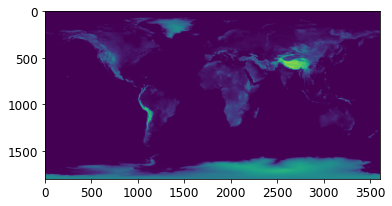

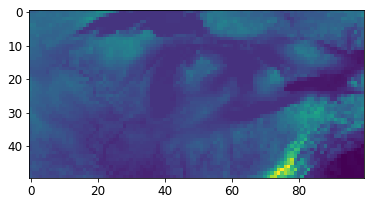

In [15]:
import numpy as np
a = np.genfromtxt("SRTM_RAMP2_TOPO_2000-02-11_rgb_3600x1800.CSV", delimiter = ",")
print(a.shape)
i = np.where(a == 99999.)
a[i] = 0.0
plt.imshow(a);plt.show()

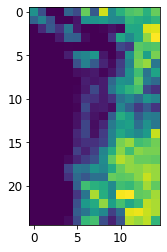

In [50]:

map1 = a[400:500, 540:600] #420:520, 850:1050]
map1 = map1[::4,::4]   
plt.imshow(map1);plt.show()

data = np.empty((np.prod(map1.shape),3))
counter = 0

for i in range(map1.shape[0]):
    for j in range(map1.shape[1]):
        data[counter,0] = i
        data[counter,1] = j
        data[counter,2] = map1[i,j]
        counter += 1


In [51]:
np.save('west_coast', data)

In [52]:
map1.shape

(25, 15)

In [53]:
np.prod(map1.shape)

375